<a href="https://colab.research.google.com/github/oms0401/mlcoe-task/blob/main/mlcoe_2_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/50_Startups.csv')

In [ ]:
df.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
6,134615.46,147198.87,127716.82,California,156122.51
24,77044.01,NaN,140574.81,New York,108552.04
30,61994.48,NaN,91131.24,Florida,99937.59
2,153441.51,101145.55,407934.54,Florida,191050.39
1,162597.70,151377.59,443898.53,California,191792.06
17,94657.16,145077.58,282574.31,New York,125370.37
19,86419.70,153514.11,0.00,New York,122776.86
35,NaN,85047.44,205517.64,New York,96479.51
33,NaN,NaN,214634.81,Florida,96778.92
32,NaN,NaN,46085.25,California,97427.84


In [ ]:
#basic information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
#stats analysis on the dataset
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,38.000000,32.000000,50.000000,50.000000
mean,84471.755526,124460.951250,211025.097800,112012.639200
std,47140.937802,24360.580496,122290.310726,40306.180338
min,0.000000,51743.150000,0.000000,14681.400000
25%,65716.990000,113049.002500,129300.132500,90138.902500
50%,82404.585000,125604.625000,212716.240000,107978.190000
75%,120392.700000,145190.700000,299469.085000,139765.977500
max,165349.200000,157693.920000,471784.100000,192261.830000


In [ ]:
#getting the dimension of the dataset

print('There are ',df.shape[0],'rows and ',df.shape[1],'columns in the dataset.')

There are  50 rows and  5 columns in the dataset.


In [ ]:
#checking for the duplicate values

print('There are',df.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


In [ ]:
#checking for the null values in the dataset

df.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

<Axes: ylabel='Density'>

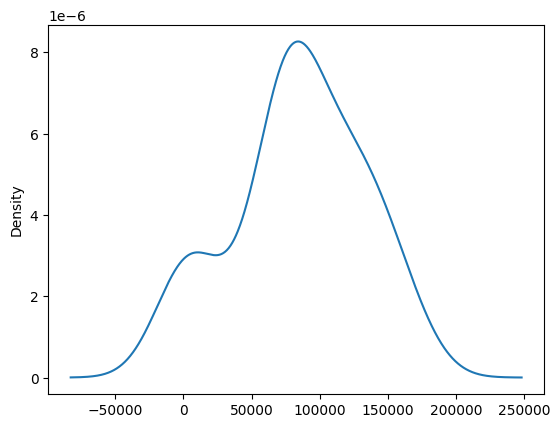

In [ ]:
df['R&D Spend'].plot(kind='kde')

**checking the mean median mode of administration and r&d column**

In [ ]:
df['R&D Spend'].median()

82404.58499999999

In [ ]:
df['R&D Spend'].mean()

84471.75552631578

In [ ]:
df['R&D Spend'].mode()[0]

0.0

In [ ]:
df['R&D Spend mean']=df['R&D Spend'].fillna(84471.75552631578)

<Axes: ylabel='Density'>

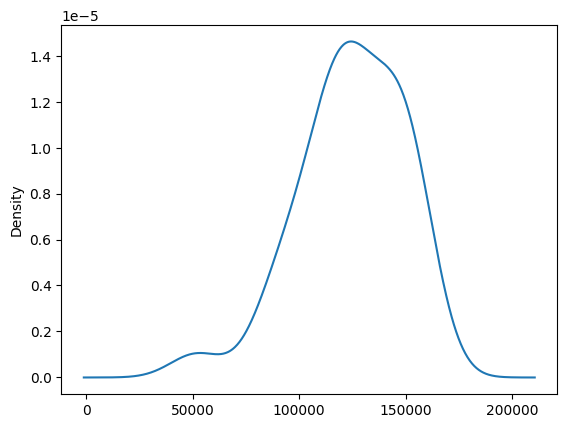

In [ ]:
df['Administration'].plot(kind='kde')

In [ ]:
df['Administration'].mode()[0]

51743.15

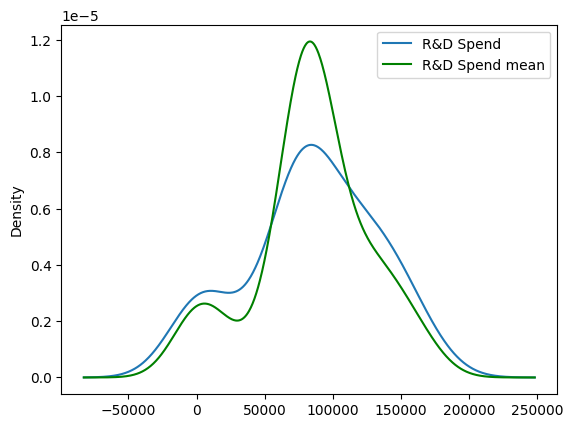

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['R&D Spend'].plot(kind='kde', ax=ax)


# variable imputed with the mean
df['R&D Spend mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
#filling the value with mode
df['R&D Spend mode']=df['R&D Spend'].fillna(0.0)

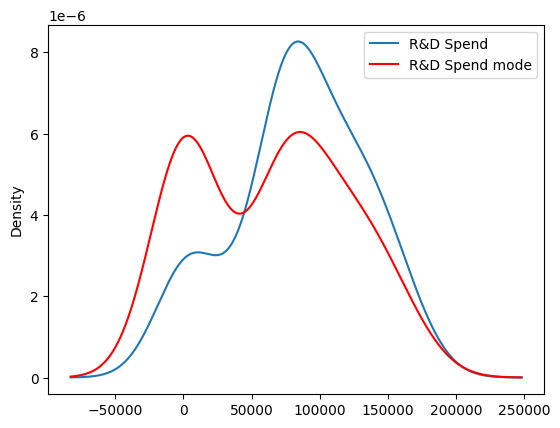

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['R&D Spend'].plot(kind='kde', ax=ax)


# variable imputed with the mean
df['R&D Spend mode'].plot(kind='kde', ax=ax, color='r')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
df['Administration mode']=df['Administration'].fillna(51743.15)

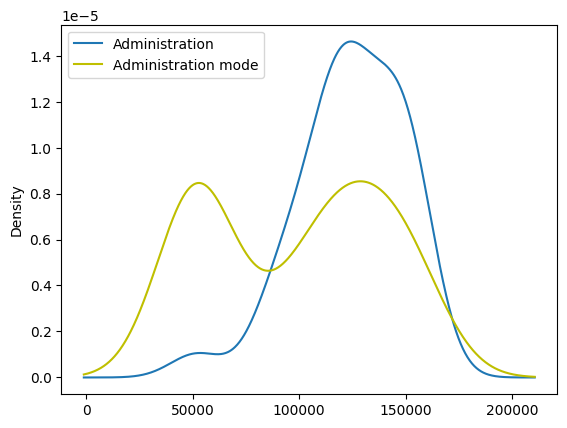

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Administration'].plot(kind='kde', ax=ax)


# variable imputed with the mean
df['Administration mode'].plot(kind='kde', ax=ax, color='y')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
df = df.drop(['Administration mode','R&D Spend mode','R&D Spend mean'], axis = 1)

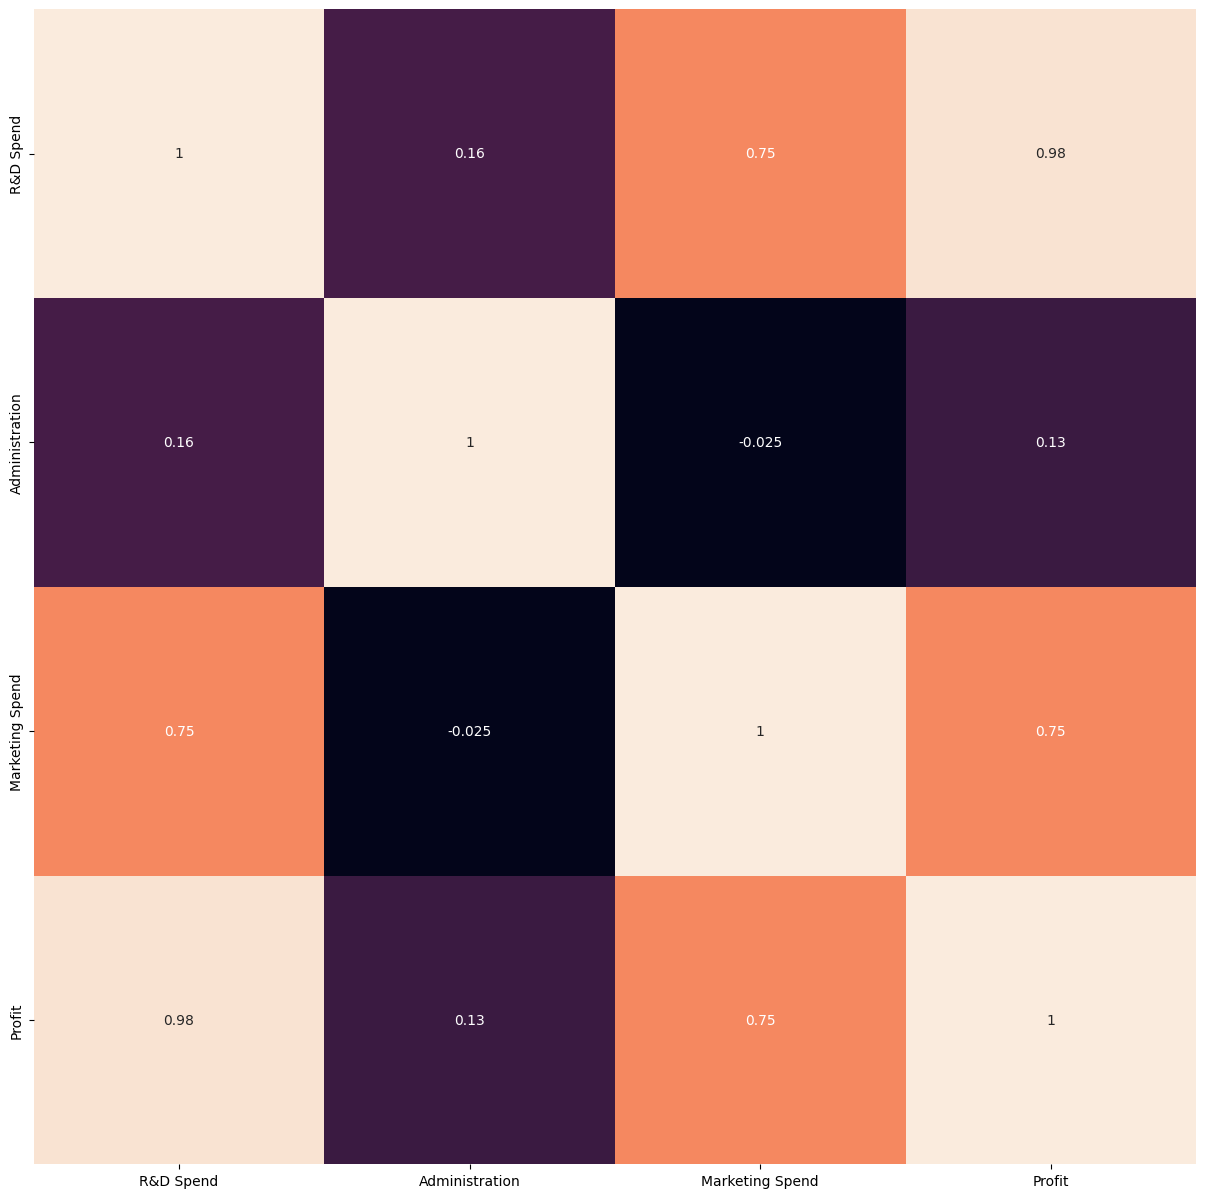

In [ ]:
#HEATMAPS
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only='True'), annot=True, cbar=False)
plt.show()

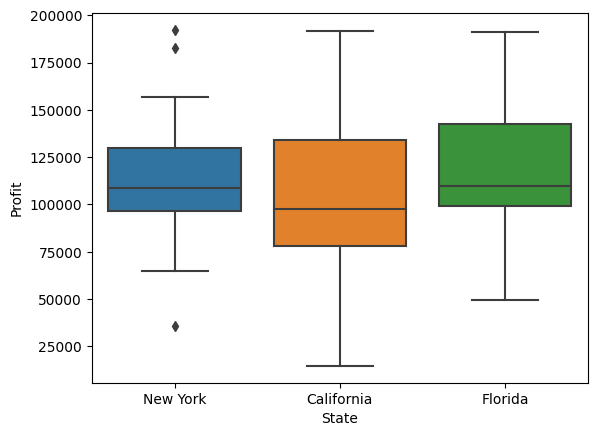

In [ ]:
sns.boxplot(x = 'State', y = 'Profit', data = df)
plt.show()

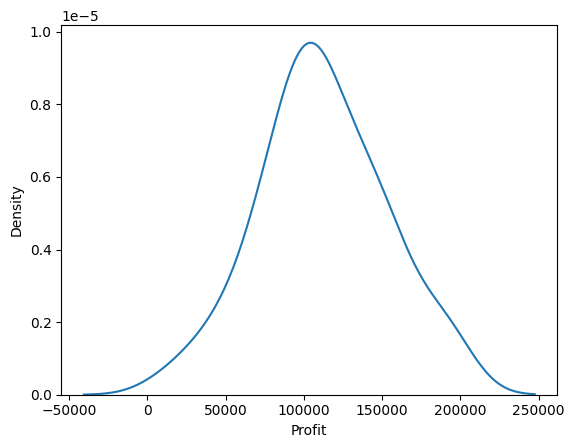

In [ ]:
sns.kdeplot(df['Profit'])
plt.show()

In [ ]:
#train - test split
X=df.drop(['Profit'],axis=1)

In [ ]:
y=df['Profit']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)
X_train

,R&D Spend,Administration,Marketing Spend,State
9,123334.88,108679.17,304981.62,California
3,144372.41,118671.85,383199.62,New York
30,61994.48,NaN,91131.24,Florida
33,NaN,NaN,214634.81,Florida
6,134615.46,147198.87,127716.82,California
28,66051.52,NaN,118148.20,Florida
4,142107.34,91391.77,366168.42,Florida
32,NaN,NaN,46085.25,California
25,64664.71,NaN,137962.62,California
47,0.00,135426.92,0.00,California


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si_r = SimpleImputer()
si_admin = SimpleImputer(strategy='most_frequent')

X_train_r = si_r.fit_transform(X_train[['R&D Spend']])
X_train_admin = si_admin.fit_transform(X_train[['Administration']])

X_test_r = si_r.transform(X_test[['R&D Spend']])
X_test_admin = si_admin.transform(X_test[['Administration']])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe_State = OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train_State = ohe_State.fit_transform(X_train[['State']])

X_test_State = ohe_State.transform(X_test[['State']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test_admin


array([[115816.21],
       [ 85047.44],
       [ 51743.15],
       [121597.55],
       [127056.21],
       [127320.38],
       [135495.07],
       [136897.8 ],
       [116983.8 ],
       [154806.14]])

In [ ]:
X_train_rem=X_train.drop(columns=['R&D Spend','Administration','State',]).values

In [ ]:
X_test_rem=X_test.drop(columns=['R&D Spend','Administration','State']).values

In [ ]:
X_train_transformed = np.concatenate((X_train_rem,X_train_r,X_train_admin,X_train_State),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_r,X_test_admin,X_test_State),axis=1)

In [ ]:
model=LinearRegression()
model.fit(X_train_transformed,y_train)

LinearRegression()

In [ ]:
model.score(X_train_transformed,y_train)

0.8072860008049106

In [ ]:
y_hat = model.predict(X_test_transformed)

In [ ]:
r_train=metrics.r2_score(y_test, y_hat)
print('R squared values : ',r_train)

R squared values :  0.8348542120494715
